### Downloading the data

In [2]:
!curl -O "http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 1420M    0 51487    0     0   101k      0  3:57:41 --:--:--  3:57:41  102k
  1 1420M    1 15.1M    0     0  10.2M      0  0:02:17  0:00:01  0:02:16 10.3M
  4 1420M    4 57.3M    0     0  23.2M      0  0:01:01  0:00:02  0:00:59 23.2M
  6 1420M    6 97.4M    0     0  28.1M      0  0:00:50  0:00:03  0:00:47 28.1M
  8 1420M    8  125M    0     0  27.9M      0  0:00:50  0:00:04  0:00:46 27.9M
 11 1420M   11  164M    0     0  30.0M      0  0:00:47  0:00:05  0:00:42 33.0M
 14 1420M   14  205M    0     0  31.7M      0  0:00:44  0:00:06  0:00:38 38.0M
 17 1420M   17  243M    0     0  32.5M      0  0:00:43  0:00:07  0:00:36 37.1M
 19 1420M   19  280M    0     0  33.1M      0  0:00:42  0:00:08  0:00:34 36.6M
 22 1420M   22  318M    0     0  33.6M      0  0:00

**Unzip the tar file**

In [ ]:
import tarfile
import os

# Create the 'data' directory if it doesn't exist
os.makedirs('D:\Lab Setup\speech-to-text\AudioFiles\data', exist_ok=True)

# Extract the tar.gz file
with tarfile.open('D:\Lab Setup\speech-to-text\AudioFiles\speech_commands_v0.01.tar.gz', 'r:gz') as tar:
    tar.extractall(path='D:\Lab Setup\speech-to-text\AudioFiles\data')

print("Extraction complete. Files are in the 'data' directory.")


Extraction complete. Files are in the 'data' directory.


**Import the packages**

In [4]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

**Data Exploration and Visualization**

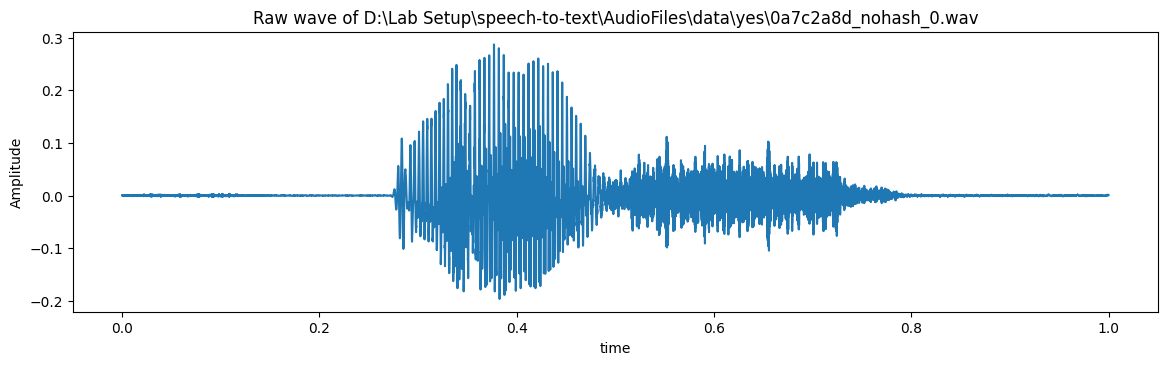

In [6]:
train_audio_path = 'D:\Lab Setup\speech-to-text\AudioFiles\data'
samples,sample_rate = librosa.load(train_audio_path+'\\yes\\0a7c2a8d_nohash_0.wav',sr = 16000)
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + train_audio_path+'\\yes\\0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

**Sampling rate**

In [7]:
ipd.Audio(samples,rate = sample_rate)
print(sample_rate)

16000


**Resampling**

In [9]:
samples = librosa.resample(y=samples, orig_sr=sample_rate, target_sr=8000)
ipd.Audio(samples, rate=8000)

### Number of recording of each voices

In [11]:
labels = os.listdir(train_audio_path)
labels

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'LICENSE',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'README.md',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'testing_list.txt',
 'three',
 'tree',
 'two',
 'up',
 'validation_list.txt',
 'wow',
 'yes',
 'zero',
 '_background_noise_']

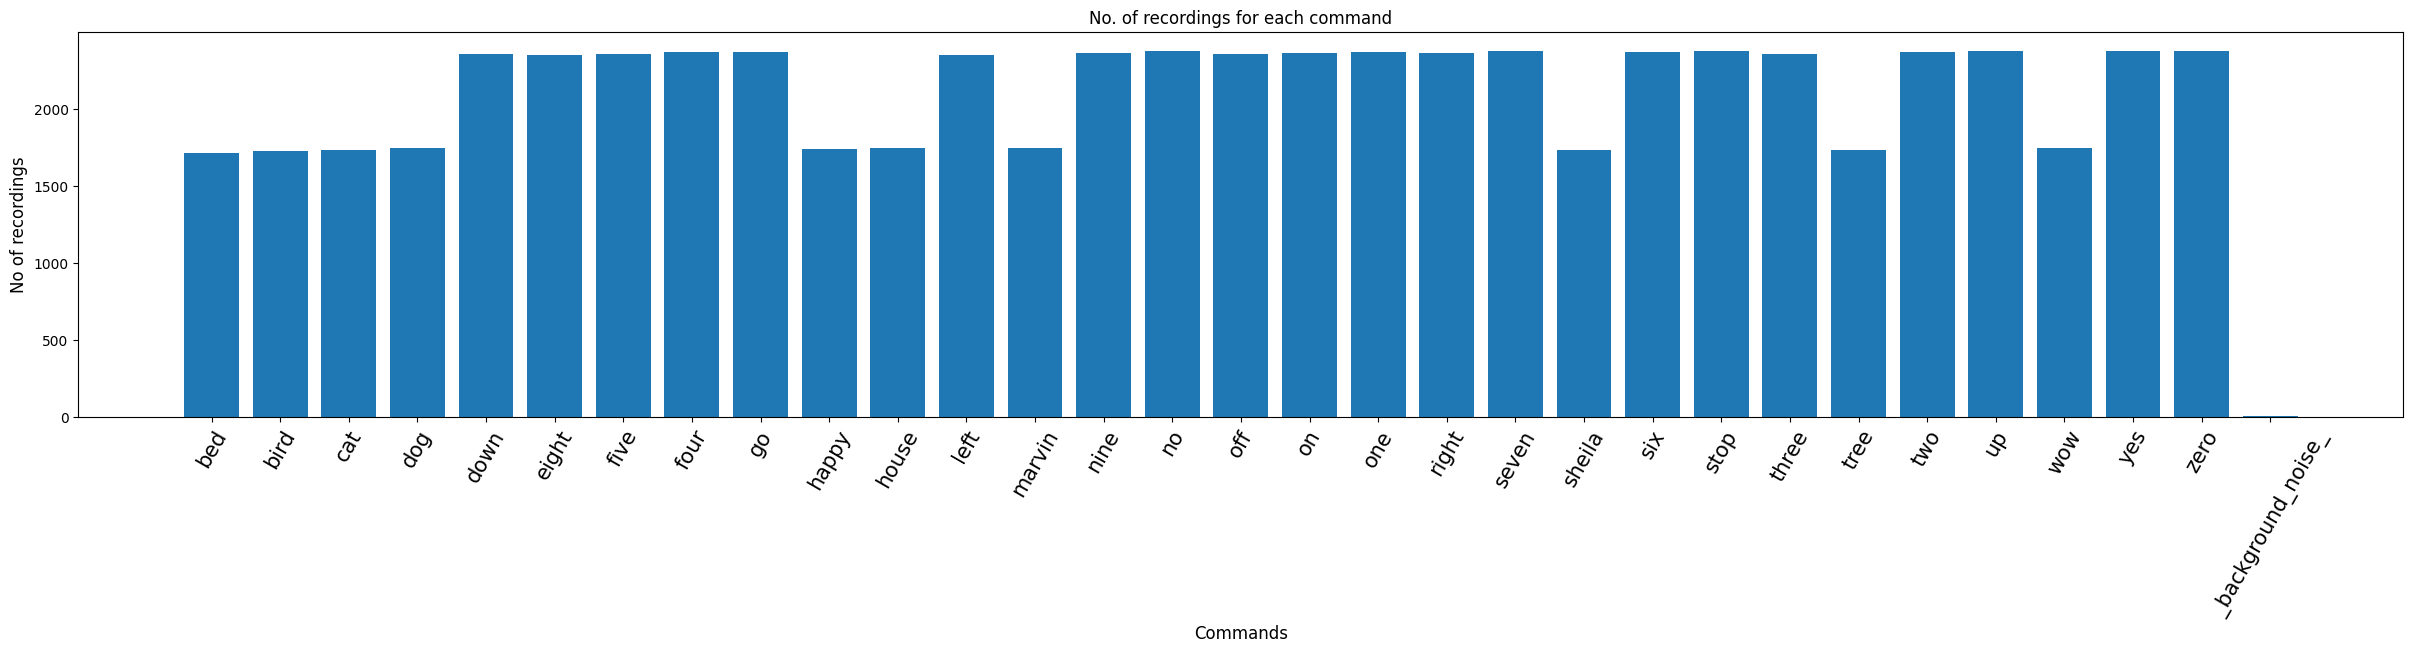

In [14]:
labels = [label for label in os.listdir(train_audio_path) if os.path.isdir(os.path.join(train_audio_path, label))]

#find count of each label and plot bar graph
no_of_recordings = []
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '\\' + label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

labels = ["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

### Duration of recordings

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

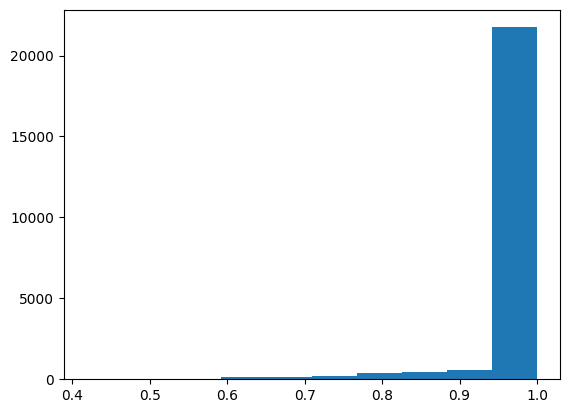

In [16]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '\\' + label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '\\' + label + '\\' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

**Preprocessing the audio waves**

In [19]:
train_audio_path = 'D:\\Lab Setup\\speech-to-text\\AudioFiles\\data'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '\\' + label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '\\' + label + '\\' + wav, sr=16000)
        samples = librosa.resample(y=samples, orig_sr=sample_rate, target_sr=8000)
        if len(samples) == 8000:
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(all_label)
classes = list(le.classes_)

In [22]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=len(labels))
all_waves = np.array(all_wave).reshape(-1, 8000, 1)

**Split into train and validation set**

In [23]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(np.array(all_wave),np.array(y),stratify = y,test_size = 0.2,random_state=7)

**Model building**

In [24]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 8)           112       
                                                                 
 max_pooling1d (MaxPooling1  (None, 2662, 8)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 2662, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 884, 16)           0         
 g1D)                                                        

In [25]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [26]:
es = EarlyStopping(monitor = 'val_loss',mode = 'min',verbose = 1,patience = 10,min_delta = 0.0001)
mc = ModelCheckpoint('best_model.hdf5',monitor = 'val_acc',verbose = 1,save_best_only = True,mode = 'max')

In [28]:
history = model.fit(x_tr,y_tr,epochs = 10,callbacks=[es,mc],batch_size =32,validation_data = (x_val,y_val))

Epoch 1/10
533/533 [==============================] - 48s 90ms/step - loss: 1.8165 - accuracy: 0.3213 - val_loss: 1.4550 - val_accuracy: 0.5079
Epoch 2/10
533/533 [==============================] - 52s 98ms/step - loss: 1.3791 - accuracy: 0.5087 - val_loss: 1.2435 - val_accuracy: 0.5841
Epoch 3/10
533/533 [==============================] - 50s 95ms/step - loss: 1.1286 - accuracy: 0.6070 - val_loss: 1.0849 - val_accuracy: 0.6183
Epoch 4/10
533/533 [==============================] - 51s 97ms/step - loss: 0.9849 - accuracy: 0.6654 - val_loss: 0.9100 - val_accuracy: 0.6812
Epoch 5/10
533/533 [==============================] - 52s 97ms/step - loss: 0.8651 - accuracy: 0.7080 - val_loss: 0.8264 - val_accuracy: 0.7277
Epoch 6/10
533/533 [==============================] - 50s 94ms/step - loss: 0.7847 - accuracy: 0.7343 - val_loss: 0.6540 - val_accuracy: 0.7783
Epoch 7/10
533/533 [==============================] - 51s 96ms/step - loss: 0.7099 - accuracy: 0.7614 - val_loss: 0.5877 - val_accuracy:

**Save the Model**

In [29]:
model.save("D:\\Lab Setup\\speech-to-text\\Models\\trained_model.hdf5")

**Diagnostic plot**

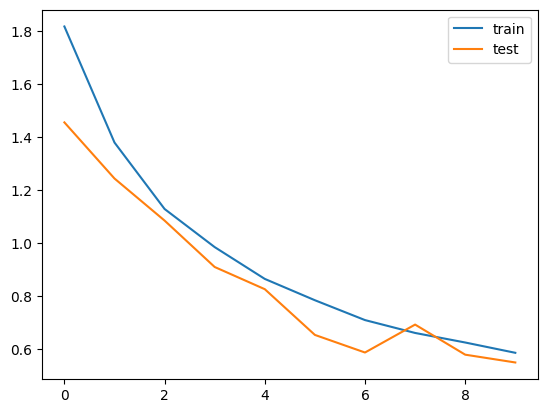

In [30]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.savefig("plot.jpg")
pyplot.show()

**Loading the trained model**

In [33]:
from keras.models import load_model
model=load_model('D:\\Lab Setup\\speech-to-text\\Models\\trained_model.hdf5')
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [34]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))

Audio: on
1/1 [==============================] - 0s 143ms/step
Text: stop
